In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
print(os.listdir('/kaggle/input/digit-recognizer/'))
path_train = '/kaggle/input/digit-recognizer/train.csv'
path_test = '/kaggle/input/digit-recognizer/test.csv'

['sample_submission.csv', 'train.csv', 'test.csv']


In [3]:
data = pd.read_csv(path_train)
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(42000, 785)

In [5]:
print(f"total nan values in the dataset are = {data.isna().sum().sum()}")

total nan values in the dataset are = 0


In [6]:
# plot and image randomly
rand_int = np.random.randint(0, (data.shape[0] - 1))
rand_image = data.iloc[rand_int][1:]
rand_image = rand_image.to_numpy()
rand_image = rand_image.reshape(28, 28)

1


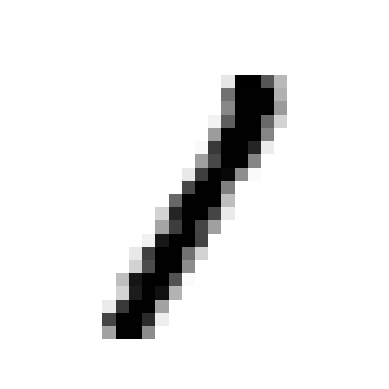

In [7]:
import matplotlib.pyplot as plt

plt.imshow(rand_image, cmap='binary', interpolation='nearest')
plt.axis('off')
print(data['label'][rand_int]) # prints the random_integer

In [8]:
X_train = data.drop(columns=['label'])
y_train = data['label']

In [9]:
# train an sgd_classifier model
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

In [10]:
cvs_accuracy = cross_val_score(sgd_clf, X_train, y_train, scoring='accuracy', cv=5)

In [11]:
cvs_accuracy

array([0.88309524, 0.85892857, 0.8827381 , 0.86464286, 0.87964286])

In [12]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=4)

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)

In [14]:
cm

array([[3939,    0,   13,   14,   12,   16,   78,    2,   46,   12],
       [   2, 4543,   31,   14,    6,   10,   21,    7,   44,    6],
       [  21,   48, 3532,  130,   61,   10,  163,   45,  148,   19],
       [  22,   28,  149, 3732,   12,   83,   61,   32,  153,   79],
       [  14,   26,   24,    8, 3545,    2,  100,   15,  111,  227],
       [  70,   33,   45,  296,  136, 2542,  225,   23,  337,   88],
       [  25,    4,   22,    5,   17,   27, 4009,    1,   27,    0],
       [  21,   22,   74,   31,   73,    6,    5, 3752,   41,  376],
       [  27,  109,   65,  170,   47,   52,   77,   17, 3386,  113],
       [  24,   26,   12,   62,  337,   16,    6,  142,  166, 3397]])

In [15]:
from sklearn.metrics import f1_score, precision_score, recall_score

precision = precision_score(y_train, y_train_pred, average='weighted')
recall = recall_score(y_train, y_train_pred, average='weighted')
f1 = f1_score(y_train, y_train_pred, average='weighted')

In [16]:
print(f"precision : {precision}, recall : {recall}, f1 : {f1}")

precision : 0.8695411901164057, recall : 0.8661190476190476, f1 : 0.8651405566085109


In [17]:
decision_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=4, method='decision_function')

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve